# CIFAR Noise Level vs Curvature

free params vs straightnees in last or most straight layer
accuracy vs straightness in last or most straight layer


In [115]:
import numpy
import matplotlib.pyplot as plt
import numpy as np
import os
import csv
import matplotlib as mpl
import pandas as pd

## Import .csv files

In [116]:
hs_path = '/home/gridsan/groups/RosenholtzLab/PredStraightening/Henaff_straightening'
merged = pd.read_csv(os.path.join(hs_path,'CombinedSpreadsheet.csv'),index_col=0)
merged

,network,variant,layer_names,natural_curves,natural_ste,contrast_curves,contrast_ste,artificial_curves,artificial_ste,network_type,...,adversarial_acc_l2_3,adversarial_acc_linf_4,adversarial_acc_linf_8,adversarial_acc_corrpution,Training Epochs,MSE,perceptual_loss,Unnamed: 23,Link Paper,Link Github
0,resnet50,pretrained_resnet50_v1_dl,Pixel,81.103462,6.611190,0.005731,0.001269,0.004864,0.001580,image,...,NaN,NaN,NaN,38.8,110,NaN,NaN,NaN,https://arxiv.org/pdf/1512.03385.pdf,NaN
1,resnet50,pretrained_resnet50_v1_dl,Conv1,84.671944,7.606118,0.008733,0.002143,0.007419,0.001593,image,...,NaN,NaN,NaN,38.8,110,NaN,NaN,NaN,https://arxiv.org/pdf/1512.03385.pdf,NaN
2,resnet50,pretrained_resnet50_v1_dl,BN1,92.490631,7.139708,3.743569,0.573705,6.011790,0.566234,image,...,NaN,NaN,NaN,38.8,110,NaN,NaN,NaN,https://arxiv.org/pdf/1512.03385.pdf,NaN
3,resnet50,pretrained_resnet50_v1_dl,Relu,92.490631,7.139708,3.743569,0.573705,6.011790,0.566234,image,...,NaN,NaN,NaN,38.8,110,NaN,NaN,NaN,https://arxiv.org/pdf/1512.03385.pdf,NaN
4,resnet50,pretrained_resnet50_v1_dl,MxPool,94.094658,3.421941,0.935483,0.145409,22.644083,1.626994,image,...,NaN,NaN,NaN,38.8,110,NaN,NaN,NaN,https://arxiv.org/pdf/1512.03385.pdf,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,cifar_robust,robust_cifar_resnet50_linf_8,L1,65.681099,6.378656,13.976702,1.302922,21.818581,1.072410,image,...,NaN,NaN,53.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,cifar_robust,robust_cifar_resnet50_linf_8,L2,62.720871,5.647836,13.812551,1.456095,21.385033,1.130864,image,...,NaN,NaN,53.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,cifar_robust,robust_cifar_resnet50_linf_8,L3,62.005402,6.104327,11.279820,1.646222,21.011490,1.121466,image,...,NaN,NaN,53.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,cifar_robust,robust_cifar_resnet50_linf_8,L4,62.750904,5.919024,8.576548,1.191017,20.304855,0.765509,image,...,NaN,NaN,53.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Output Layers for CIFAR Networks

In [117]:
output_layers = merged[merged['layer_names']=='output']
output_layers = output_layers[output_layers['network'].isin(['cifar_robust','resnet50'])]
output_layers

,network,variant,layer_names,natural_curves,natural_ste,contrast_curves,contrast_ste,artificial_curves,artificial_ste,network_type,...,adversarial_acc_l2_3,adversarial_acc_linf_4,adversarial_acc_linf_8,adversarial_acc_corrpution,Training Epochs,MSE,perceptual_loss,Unnamed: 23,Link Paper,Link Github
10,resnet50,pretrained_resnet50_v1_dl,output,93.587120,2.655478,24.210865,3.203939,54.929287,1.666693,image,...,NaN,NaN,NaN,38.8,110,NaN,NaN,NaN,https://arxiv.org/pdf/1512.03385.pdf,NaN
21,resnet50,robust_imagenet_l2_3_0,output,53.918362,5.099221,7.386962,1.513843,22.705772,0.556186,image,...,NaN,0.03,0.01,NaN,110,NaN,NaN,NaN,NaN,NaN
32,resnet50,robust_imagenet_linf_4,output,79.162598,6.559293,14.544566,2.608680,27.224451,1.294454,image,...,NaN,33.38,12.73,NaN,110,NaN,NaN,NaN,NaN,NaN
43,resnet50,robust_imagenet_linf_8,output,78.491852,6.936379,6.722800,1.259645,23.058197,0.577385,image,...,NaN,33.03,19.52,NaN,110,NaN,NaN,NaN,NaN,NaN
54,resnet50,robust_RestrictedImageNet,output,57.740238,6.787717,7.486613,2.155506,22.845179,1.160420,image,...,81.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,resnet50,RestrictedImageNetNat,output,92.618813,4.299600,18.537458,3.505653,42.963512,2.608041,image,...,4.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,cifar_robust,pretrained_cifar_resnet50_standard,output,83.981133,6.187444,16.675228,2.346479,30.626009,2.085745,image,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,cifar_robust,robust_cifar_resnet50_l2_0_25,output,52.580227,5.663942,6.616712,1.818931,19.936747,0.501880,image,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,cifar_robust,robust_cifar_resnet50_l2_0_5,output,53.931377,6.979227,4.963535,0.972074,19.665195,0.343692,image,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,cifar_robust,robust_cifar_resnet50_l2_1,output,52.377659,5.826879,4.800129,1.126745,18.684160,0.382025,image,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
output_natural_curves = np.array(output_layers['natural_curves'],dtype=np.float32)
output_names = np.array(output_layers['variant'],dtype=str)
output_nettype = np.array(output_layers['network_type'],dtype=str)
output_adversarial = np.array(output_layers['adversarial'],dtype=str)
output_contrast_curves = np.array(output_layers['contrast_curves'],dtype=np.float32)
output_artificial_curves = np.array(output_layers['artificial_curves'],dtype=np.float32)
output_test_acc_cifar = np.array(output_layers['test_acc_cifar'],dtype=np.float32)
ouput_l2_adv_str = np.array(output_layers['adversarial_attack_strength_l2'],dtype=np.float32)
ouput_linf_adv_str = np.array(output_layers['adversarial_attack_strength_linf'],dtype=np.float32)

#output_free_params = np.array(output_layers['free_params'],dtype=np.float32)
#output_val_acc = np.array(output_layers['val_acc'],dtype=np.float32)
#output_test_acc = np.array(output_layers['test_acc'],dtype=np.float32)
#output_lp_acc = np.array(output_layers['Linear Probe Accuracy (top 1)'],dtype=np.float32)
##output_mse = np.array(output_layers['MSE'],dtype=np.float32)
#output_perceptual_loss = np.array(output_layers['perceptual_loss'],dtype=np.float32)

In [119]:
output_names

array(['pretrained_resnet50_v1_dl', 'robust_imagenet_l2_3_0',
       'robust_imagenet_linf_4', 'robust_imagenet_linf_8',
       'robust_RestrictedImageNet', 'RestrictedImageNetNat',
       'pretrained_cifar_resnet50_standard',
       'robust_cifar_resnet50_l2_0_25', 'robust_cifar_resnet50_l2_0_5',
       'robust_cifar_resnet50_l2_1', 'robust_cifar_resnet50_linf_8'],
      dtype='<U34')

Text(0.5, 1.0, 'L2 Adversarial Attack vs Output Curvature')

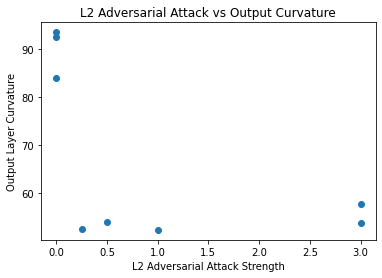

In [120]:
plt.scatter(ouput_l2_adv_str, output_natural_curves)
plt.xlabel('L2 Adversarial Attack Strength')
plt.ylabel('Output Layer Curvature')
plt.title('L2 Adversarial Attack vs Output Curvature')

Text(0.5, 1.0, 'Linf Adversarial Attack vs Output Curvature')

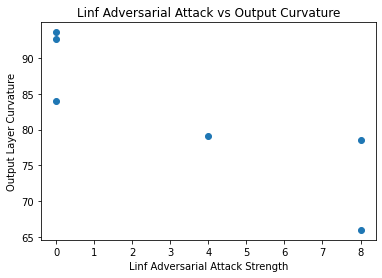

In [121]:
plt.scatter(ouput_linf_adv_str,output_natural_curves)
plt.xlabel('Linf Adversarial Attack Strength')
plt.ylabel('Output Layer Curvature')
plt.title('Linf Adversarial Attack vs Output Curvature')

In [122]:
ouput_l2_adv_str

array([0.  , 3.  ,  nan,  nan, 3.  , 0.  , 0.  , 0.25, 0.5 , 1.  ,  nan],
      dtype=float32)

In [123]:
ouput_linf_adv_str/255.

array([0.        ,        nan, 0.01568628, 0.03137255,        nan,
       0.        , 0.        ,        nan,        nan,        nan,
       0.03137255], dtype=float32)

In [124]:
output_natural_curves[ouput_l2_adv_str==0]

array([93.58712, 92.61881, 83.98113], dtype=float32)

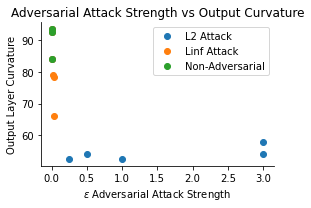

In [126]:
plt.figure(figsize=(4,3))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(ouput_l2_adv_str, output_natural_curves,label='L2 Attack',marker='o',linestyle='none')
plt.plot(ouput_linf_adv_str/255., output_natural_curves,label='Linf Attack',marker='o',linestyle='none')
plt.plot([0,0,0], output_natural_curves[ouput_l2_adv_str==0],label='Non-Adversarial',marker='o',linestyle='none')
#plt.xscale('symlog')
plt.xlabel('$ε$ Adversarial Attack Strength')
plt.ylabel('Output Layer Curvature')
plt.legend()
plt.title('Adversarial Attack Strength vs Output Curvature')

plt.tight_layout()
plt.savefig(os.path.join(hs_path,'output_plots','attack_strength_curvature.png'))

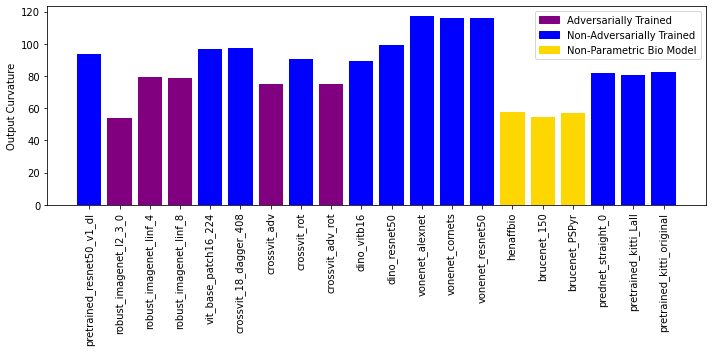

In [78]:
#domain = ['image','bio','video']
#colors = ['orange','purple','red']
domain = ['TRUE','FALSE','NONPARA']
colors = ['purple','blue','gold']
color_map = dict(zip(domain, colors)) 
colorize = lambda x : color_map[x]
c = list(map(colorize, output_adversarial))

colors = {'Adversarially Trained':'purple',
          'Non-Adversarially Trained':'blue',
          'Non-Parametric Bio Model':'gold'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

plt.figure(figsize=(10,5))
plt.bar(np.arange(len(output_natural_curves)),
        height=output_natural_curves,
        tick_label=output_names,
        color=c,
        label=domain)
plt.xticks(rotation = 90)
plt.ylabel('Output Curvature')
plt.legend(handles, labels)
plt.tight_layout()
plt.savefig(os.path.join(hs_path,'output_plots','bar_output_curvature_models.png'))

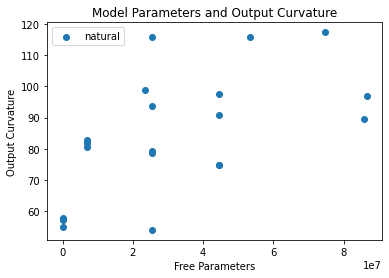

In [79]:
plt.scatter(output_free_params,output_natural_curves,label='natural')
#plt.scatter(output_free_params,output_contrast_curves,label='contrast')
#plt.scatter(output_free_params,output_artificial_curves,label='artificial')
plt.xlabel('Free Parameters')
plt.ylabel('Output Curvature')
plt.legend()
plt.title('Model Parameters and Output Curvature')

plt.savefig(os.path.join(hs_path,'output_plots','free_params_vs_output_curvature.png'))
#output_layers.plot(kind='scatter',x='free_params',y='natural_curves',legend=True)

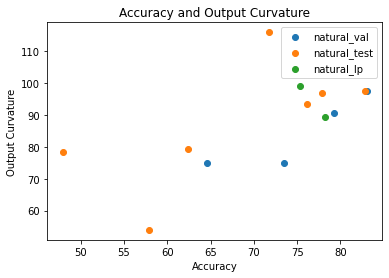

In [62]:
plt.scatter(output_val_acc,output_natural_curves,label='natural_val')
# plt.scatter(output_val_acc,output_contrast_curves,label='contrast')
# plt.scatter(output_val_acc,output_artificial_curves,label='artificial')

plt.scatter(output_test_acc,output_natural_curves,label='natural_test')
#plt.scatter(output_test_acc,output_contrast_curves,label='contrast')
#plt.scatter(output_test_acc,output_artificial_curves,label='artificial')

plt.scatter(output_lp_acc,output_natural_curves,label='natural_lp')
#plt.scatter(output_lp_acc,output_contrast_curves,label='contrast_lp')
#plt.scatter(output_lp_acc,output_artificial_curves,label='artificial_lp')

plt.xlabel('Accuracy')
plt.ylabel('Output Curvature')
plt.legend()
plt.title('Accuracy and Output Curvature')

plt.savefig(os.path.join(hs_path,'output_plots','acuracy_vs_output_curvature.png'))

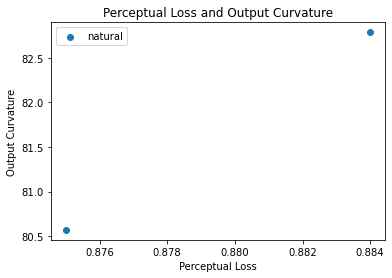

In [63]:
plt.scatter(output_perceptual_loss,output_natural_curves,label='natural')
# plt.scatter(output_perceptual_loss,contrast_curves,label='contrast')
# plt.scatter(output_perceptual_loss,artificial_curves,label='artificial')

plt.xlabel('Perceptual Loss')
plt.ylabel('Output Curvature')
plt.legend()
plt.title('Perceptual Loss and Output Curvature')

plt.savefig(os.path.join(hs_path,'output_plots','perceptua_loss_vs_output_curvature.png'))

### Plot Curvature of Least Curved Layer Per Model

In [64]:
#merged.groupby(['variant'])['natural_curves'].min()
minc_layers = merged.sort_values(['natural_curves']).groupby('variant',as_index=False).first()
minc_layers

,variant,network,layer_names,natural_curves,natural_ste,contrast_curves,contrast_ste,artificial_curves,artificial_ste,network_type,...,val_acc,Linear Probe Accuracy (top 1),adversarial_acc_whitebox (100 step),adversarial_acc_corrpution,Training Epochs,MSE,perceptual_loss,Unnamed: 13,Link Paper,Link Github
0,brucenet_brucenet_150,brucenet,output,54.81654357910156,8.8526029586792,3.241245746612549,0.4762468934059143,19.48802375793457,0.4004330039024353,bio,...,NaN,NaN,None,NaN,None,None,NaN,NaN,None,None
1,brucenet_brucenet_PSPyr,brucenet,output,57.162052154541016,8.648158073425293,3.225212812423706,0.45837366580963135,19.946619033813477,0.5522846579551697,bio,...,NaN,NaN,None,NaN,None,None,NaN,NaN,None,None
2,crossvit_18_dagger_408_path_0,crossvit,Norm1,103.19075775146484,2.0735254287719727,68.00316619873047,3.335638999938965,81.71931457519531,0.6423079967498779,image,...,83.05,NaN,None,NaN,300,None,NaN,NaN,None,None
3,crossvit_18_dagger_408_path_1,crossvit,MultiScaleBlock2,103.02361297607422,2.0220484733581543,68.05177307128906,3.101503849029541,81.61470031738281,0.6224365830421448,image,...,83.05,NaN,None,NaN,300,None,NaN,NaN,None,None
4,crossvit_adv_path_0,crossvit,MultiScaleBlock0,51.305965423583984,5.6152567863464355,9.05946159362793,1.239520788192749,14.250216484069824,0.5931649208068848,image,...,64.60,NaN,(epsilon=2/255),NaN,300+5,None,NaN,NaN,https://openreview.net/pdf?id=SOulrWP-Xb5,None
5,crossvit_adv_path_1,crossvit,PatchEmbed0,51.30596923828125,5.615255832672119,9.059493064880371,1.2395427227020264,14.25020694732666,0.5931653380393982,image,...,64.60,NaN,(epsilon=2/255),NaN,300+5,None,NaN,NaN,https://openreview.net/pdf?id=SOulrWP-Xb5,None
6,crossvit_adv_rot_path_0,crossvit,MultiScaleBlock0,51.305965423583984,5.6152567863464355,9.05946159362793,1.239520788192749,14.250216484069824,0.5931649208068848,image,...,73.53,NaN,(epsilon=2/255),NaN,300+5,None,NaN,NaN,None,None
7,crossvit_adv_rot_path_1,crossvit,PatchEmbed0,51.30596923828125,5.615255832672119,9.059493064880371,1.2395427227020264,14.25020694732666,0.5931653380393982,image,...,73.53,NaN,(epsilon=2/255),NaN,300+5,None,NaN,NaN,None,None
8,crossvit_rot_path_0,crossvit,PatchEmbed0,49.63551712036133,5.63303804397583,4.566909313201904,1.1802977323532104,8.29655933380127,0.35402798652648926,image,...,79.22,NaN,None,NaN,300,None,NaN,NaN,None,None
9,crossvit_rot_path_1,crossvit,PatchEmbed0,49.63551712036133,5.63303804397583,4.566909313201904,1.1802977323532104,8.29655933380127,0.35402798652648926,image,...,79.22,NaN,None,NaN,300,None,NaN,NaN,None,None


In [65]:
minc_natural_curves = np.array(minc_layers['natural_curves'],dtype=np.float32)
minc_contrast_curves = np.array(minc_layers['contrast_curves'],dtype=np.float32)
minc_artificial_curves = np.array(minc_layers['artificial_curves'],dtype=np.float32)
minc_free_params = np.array(minc_layers['free_params'],dtype=np.float32)
minc_val_acc = np.array(minc_layers['val_acc'],dtype=np.float32)
minc_test_acc = np.array(minc_layers['test_acc'],dtype=np.float32)
minc_lp_acc = np.array(minc_layers['Linear Probe Accuracy (top 1)'],dtype=np.float32)
#minc_mse = np.array(minc_layers['MSE'],dtype=np.float32)
minc_perceptual_loss = np.array(minc_layers['perceptual_loss'],dtype=np.float32)

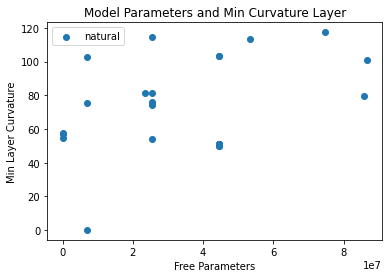

In [66]:
plt.scatter(minc_free_params,minc_natural_curves,label='natural')
#plt.scatter(minc_free_params,minc_contrast_curves,label='contrast')
#plt.scatter(minc_free_params,minc_artificial_curves,label='artificial')
plt.xlabel('Free Parameters')
plt.ylabel('Min Layer Curvature')
plt.legend()
plt.title('Model Parameters and Min Curvature Layer')

plt.savefig(os.path.join(hs_path,'output_plots','free_params_vs_minc_curvature.png'))

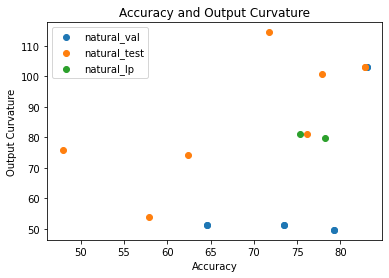

In [67]:
plt.scatter(minc_val_acc,minc_natural_curves,label='natural_val')
# plt.scatter(minc_val_acc,minc_contrast_curves,label='contrast')
# plt.scatter(minc_val_acc,minc_artificial_curves,label='artificial')

plt.scatter(minc_test_acc,minc_natural_curves,label='natural_test')
#plt.scatter(minc_test_acc,minc_contrast_curves,label='contrast')
#plt.scatter(minc_test_acc,minc_artificial_curves,label='artificial')

plt.scatter(minc_lp_acc,minc_natural_curves,label='natural_lp')
#plt.scatter(minc_lp_acc,minc_contrast_curves,label='contrast_lp')
#plt.scatter(minc_lp_acc,minc_artificial_curves,label='artificial_lp')

plt.xlabel('Accuracy')
plt.ylabel('Output Curvature')
plt.legend()
plt.title('Accuracy and Output Curvature')

plt.savefig(os.path.join(hs_path,'output_plots','acuracy_vs_minc_curvature.png'))

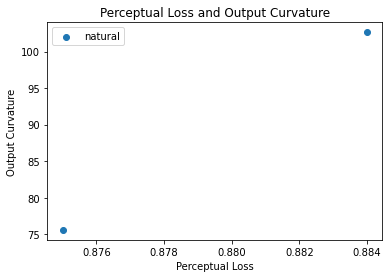

In [68]:
plt.scatter(minc_perceptual_loss,minc_natural_curves,label='natural')
# plt.scatter(minc_perceptual_loss,contrast_curves,label='contrast')
# plt.scatter(minc_perceptual_loss,artificial_curves,label='artificial')

plt.xlabel('Perceptual Loss')
plt.ylabel('Output Curvature')
plt.legend()
plt.title('Perceptual Loss and Output Curvature')

plt.savefig(os.path.join(hs_path,'output_plots','perceptual_loss_vs_minc_curvature.png'))

### Plot Curvature of Most Curved Layer Per Model

In [69]:
#merged.groupby(['variant'])['natural_curves'].min()
maxc_layers = merged.sort_values(['natural_curves']).groupby('variant',as_index=False).last()
maxc_layers

,variant,network,layer_names,natural_curves,natural_ste,contrast_curves,contrast_ste,artificial_curves,artificial_ste,network_type,...,val_acc,Linear Probe Accuracy (top 1),adversarial_acc_whitebox (100 step),adversarial_acc_corrpution,Training Epochs,MSE,perceptual_loss,Unnamed: 13,Link Paper,Link Github
0,brucenet_brucenet_150,brucenet,Pixel,81.10346221923828,6.905162811279297,0.005730518605560064,0.00120999023783952,0.004864321555942297,0.0016498435288667679,bio,...,NaN,NaN,None,NaN,None,None,NaN,NaN,None,None
1,brucenet_brucenet_PSPyr,brucenet,Pixel,81.10346221923828,6.905162811279297,0.005730518605560064,0.00120999023783952,0.004864321555942297,0.0016498435288667679,bio,...,NaN,NaN,None,NaN,None,None,NaN,NaN,None,None
2,crossvit_18_dagger_408_path_0,crossvit,Head1,98.00452423095703,4.870128631591797,44.0686149597168,4.090191841125488,57.11776351928711,1.9275975227355957,image,...,83.05,NaN,None,NaN,300,None,NaN,NaN,None,None
3,crossvit_18_dagger_408_path_1,crossvit,MultiScaleBlock1,99.2197036743164,2.300211191177368,52.5726318359375,3.7705776691436768,74.53165435791016,1.1065303087234497,image,...,83.05,NaN,None,NaN,300,None,NaN,NaN,None,None
4,crossvit_adv_path_0,crossvit,Pixel,81.10346221923828,6.611190319061279,0.0057084280997514725,0.0017922549741342664,0.006771890912204981,0.0010886861709877849,image,...,64.60,NaN,(epsilon=2/255),NaN,300+5,None,NaN,NaN,https://openreview.net/pdf?id=SOulrWP-Xb5,None
5,crossvit_adv_path_1,crossvit,Pixel,81.10346221923828,6.611190319061279,0.0057084280997514725,0.0017922549741342664,0.006771890912204981,0.0010886861709877849,image,...,64.60,NaN,(epsilon=2/255),NaN,300+5,None,NaN,NaN,https://openreview.net/pdf?id=SOulrWP-Xb5,None
6,crossvit_adv_rot_path_0,crossvit,Pixel,81.10346221923828,6.611190319061279,0.0057084280997514725,0.0017922549741342664,0.006771890912204981,0.0010886861709877849,image,...,73.53,NaN,(epsilon=2/255),NaN,300+5,None,NaN,NaN,None,None
7,crossvit_adv_rot_path_1,crossvit,Pixel,81.10346221923828,6.611190319061279,0.0057084280997514725,0.0017922549741342664,0.006771890912204981,0.0010886861709877849,image,...,73.53,NaN,(epsilon=2/255),NaN,300+5,None,NaN,NaN,None,None
8,crossvit_rot_path_0,crossvit,Norm1,92.6102294921875,3.4360711574554443,38.54219055175781,4.6277384757995605,59.136016845703125,1.4892789125442505,image,...,79.22,NaN,None,NaN,300,None,NaN,NaN,None,None
9,crossvit_rot_path_1,crossvit,MultiScaleBlock2,92.7609634399414,3.4744887351989746,40.08461380004883,4.35366678237915,60.88084030151367,1.6674684286117554,image,...,79.22,NaN,None,NaN,300,None,NaN,NaN,None,None


In [70]:
maxc_natural_curves = np.array(maxc_layers['natural_curves'],dtype=np.float32)
maxc_contrast_curves = np.array(maxc_layers['contrast_curves'],dtype=np.float32)
maxc_artificial_curves = np.array(maxc_layers['artificial_curves'],dtype=np.float32)
maxc_free_params = np.array(maxc_layers['free_params'],dtype=np.float32)
maxc_val_acc = np.array(maxc_layers['val_acc'],dtype=np.float32)
maxc_test_acc = np.array(maxc_layers['test_acc'],dtype=np.float32)
maxc_lp_acc = np.array(maxc_layers['Linear Probe Accuracy (top 1)'],dtype=np.float32)
#maxc_mse = np.array(maxc_layers['MSE'],dtype=np.float32)
maxc_perceptual_loss = np.array(maxc_layers['perceptual_loss'],dtype=np.float32)

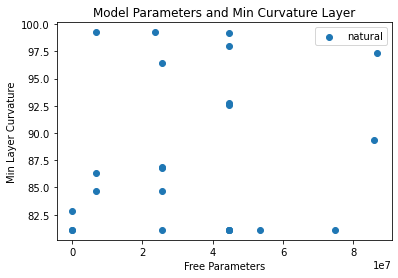

In [71]:
plt.scatter(maxc_free_params,maxc_natural_curves,label='natural')
#plt.scatter(maxc_free_params,maxc_contrast_curves,label='contrast')
#plt.scatter(maxc_free_params,maxc_artificial_curves,label='artificial')
plt.xlabel('Free Parameters')
plt.ylabel('Min Layer Curvature')
plt.legend()
plt.title('Model Parameters and Min Curvature Layer')

plt.savefig(os.path.join(hs_path,'output_plots','free_params_vs_maxc_curvature.png'))

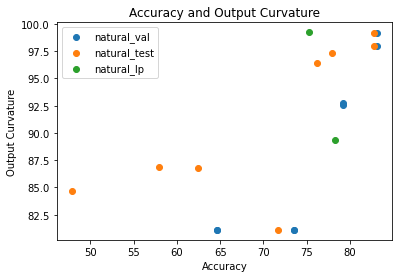

In [72]:
plt.scatter(maxc_val_acc,maxc_natural_curves,label='natural_val')
# plt.scatter(maxc_val_acc,maxc_contrast_curves,label='contrast')
# plt.scatter(maxc_val_acc,maxc_artificial_curves,label='artificial')

plt.scatter(maxc_test_acc,maxc_natural_curves,label='natural_test')
#plt.scatter(maxc_test_acc,maxc_contrast_curves,label='contrast')
#plt.scatter(maxc_test_acc,maxc_artificial_curves,label='artificial')

plt.scatter(maxc_lp_acc,maxc_natural_curves,label='natural_lp')
#plt.scatter(maxc_lp_acc,maxc_contrast_curves,label='contrast_lp')
#plt.scatter(maxc_lp_acc,maxc_artificial_curves,label='artificial_lp')

plt.xlabel('Accuracy')
plt.ylabel('Output Curvature')
plt.legend()
plt.title('Accuracy and Output Curvature')

plt.savefig(os.path.join(hs_path,'output_plots','acuracy_vs_maxc_curvature.png'))

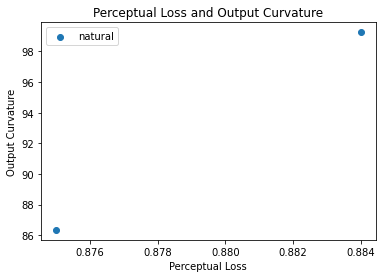

In [44]:
plt.scatter(maxc_perceptual_loss,maxc_natural_curves,label='natural')
# plt.scatter(maxc_perceptual_loss,contrast_curves,label='contrast')
# plt.scatter(maxc_perceptual_loss,artificial_curves,label='artificial')

plt.xlabel('Perceptual Loss')
plt.ylabel('Output Curvature')
plt.legend()
plt.title('Perceptual Loss and Output Curvature')

plt.savefig(os.path.join(hs_path,'output_plots','perceptual_loss_vs_maxc_curvature.png'))

In [ ]:
}